<a href="https://colab.research.google.com/github/huiningjiao02-ship-it/Huining-JIAO/blob/main/evelopment_and_Process_Automation_of_an_Image_Binary_Classification_System_Based_on_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import tarfile
import shutil # Added for moving directories

print("Ensuring Cat_Dog_Faces dataset is available...")

extract_path = '/content/Cat_Dog_Faces'
tar_path = None
dataset_exists_and_is_valid = False

# Helper function to check if the dataset structure is valid
def check_dataset_structure(base_path):
    return (
        os.path.exists(base_path) and
        os.path.exists(os.path.join(base_path, 'train/cat')) and
        os.path.exists(os.path.join(base_path, 'train/dog')) and
        os.path.exists(os.path.join(base_path, 'test/cat')) and
        os.path.exists(os.path.join(base_path, 'test/dog'))
    )

# 1. Check if the extracted folder already exists and contains expected subdirectories
if check_dataset_structure(extract_path):
    print(f"✓ Found existing and valid extracted dataset folder: {extract_path}")
    dataset_exists_and_is_valid = True
else:
    print(f"Dataset folder '{extract_path}' not found or incomplete. Attempting to extract...")

    # 2. Search for the compressed file
    possible_tar_paths = [
        '/content/Cat_Dog_Faces.tar.gz',
        '/content/sample_data/Cat_Dog_Faces.tar.gz',
        '/content/drive/MyDrive/Cat_Dog_Faces.tar.gz',
        'Cat_Dog_Faces.tar.gz'
    ]

    for path in possible_tar_paths:
        if os.path.exists(path):
            tar_path = path
            print(f"✓ Found compressed file: {tar_path}")
            break

    # 3. If compressed file is found, extract it
    if tar_path:
        print(f"Extracting {tar_path} to /content/...")
        try:
            members = []
            with tarfile.open(tar_path, 'r:gz') as tar:
                members = tar.getnames()
                tar.extractall('/content', filter='data') # Always extract to /content first
            print(f"✓ Extraction complete.")

            # After extraction, if dataset still not valid at extract_path,
            # check for common nested directories and move if found
            if not check_dataset_structure(extract_path):
                common_prefix = os.path.commonprefix(members)
                if common_prefix:
                    # Strip any trailing slash for consistent path formation
                    nested_base_name = common_prefix.strip('/')
                    nested_path = os.path.join('/content', nested_base_name)

                    if check_dataset_structure(nested_path):
                        print(f"Detected nested dataset at {nested_path}. Moving to {extract_path}...")
                        # Remove target if it exists, to avoid merge issues (if partially extracted before)
                        if os.path.exists(extract_path):
                            shutil.rmtree(extract_path)
                        shutil.move(nested_path, extract_path)
                        print(f"✓ Dataset moved from {nested_path} to {extract_path}.")
                    else:
                        print(f"✗ Nested directory '{nested_path}' found but it does not contain a valid dataset structure.")

            # 4. Final verification after potential move
            if check_dataset_structure(extract_path):
                print(f"✓ Dataset successfully verified at: {extract_path}")
                dataset_exists_and_is_valid = True
            else:
                print(f"✗ Dataset at '{extract_path}' is still not found or missing required subfolders after extraction and potential move.")
                print("It might be an issue with the tar file structure or permissions or a deeply nested folder.")
        except Exception as e:
            print(f"✗ Error during extraction: {e}")
    else:
        print("✗ No 'Cat_Dog_Faces.tar.gz' found in common locations.")

# Final check and guidance if dataset is not ready
if not dataset_exists_and_is_valid:
    print("\n✗ Dataset 'Cat_Dog_Faces' is not fully available at /content/Cat_Dog_Faces.")
    print("Please upload 'Cat_Dog_Faces.tar.gz' to Colab and run this cell again.")
    print("You can use the following code to upload:")
    print("""
from google.colab import files
uploaded = files.upload()
# Optional: Rename if necessary after upload
import os
for filename in uploaded.keys():
    if 'Cat_Dog_Faces' in filename:
        os.rename(filename, 'Cat_Dog_Faces.tar.gz')
        print(f"Renamed {filename} to Cat_Dog_Faces.tar.gz")
    """)
    # Explicitly set extract_path to None if dataset is not ready
    extract_path = None
else:
    # Print folder structure for confirmation
    print(f"\nVerifying folder structure for {extract_path}:")
    required_folders = ['train/cat', 'train/dog', 'test/cat', 'test/dog']
    for folder in required_folders:
        full_path = os.path.join(extract_path, folder)
        if os.path.exists(full_path):
            try:
                file_count = len(os.listdir(full_path))
                print(f"✓ {folder}: {file_count} files")
            except OSError as e:
                print(f"✗ {folder}: Could not list contents ({e})")
        else:
            print(f"✗ {folder}: does not exist")
    print("\nDataset preparation cell completed.")


Ensuring Cat_Dog_Faces dataset is available...
Dataset folder '/content/Cat_Dog_Faces' not found or incomplete. Attempting to extract...
✓ Found compressed file: /content/Cat_Dog_Faces.tar.gz
Extracting /content/Cat_Dog_Faces.tar.gz to /content/...
✓ Extraction complete.
Detected nested dataset at /content/AnimalFaces. Moving to /content/Cat_Dog_Faces...
✓ Dataset moved from /content/AnimalFaces to /content/Cat_Dog_Faces.
✓ Dataset successfully verified at: /content/Cat_Dog_Faces

Verifying folder structure for /content/Cat_Dog_Faces:
✓ train/cat: 3000 files
✓ train/dog: 3000 files
✓ test/cat: 500 files
✓ test/dog: 500 files

Dataset preparation cell completed.


Loading model from checkpoint: ./checkpoints/epoch6.pt


/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Model loaded successfully.

Testing the loaded model...
Test Loss: 0.0000
Test Accuracy: 100.00%

Detailed Metrics:
Accuracy:  1.0000
Precision: 1.0000
Recall:    1.0000
F1 Score:  1.0000
ROC AUC:   1.0000


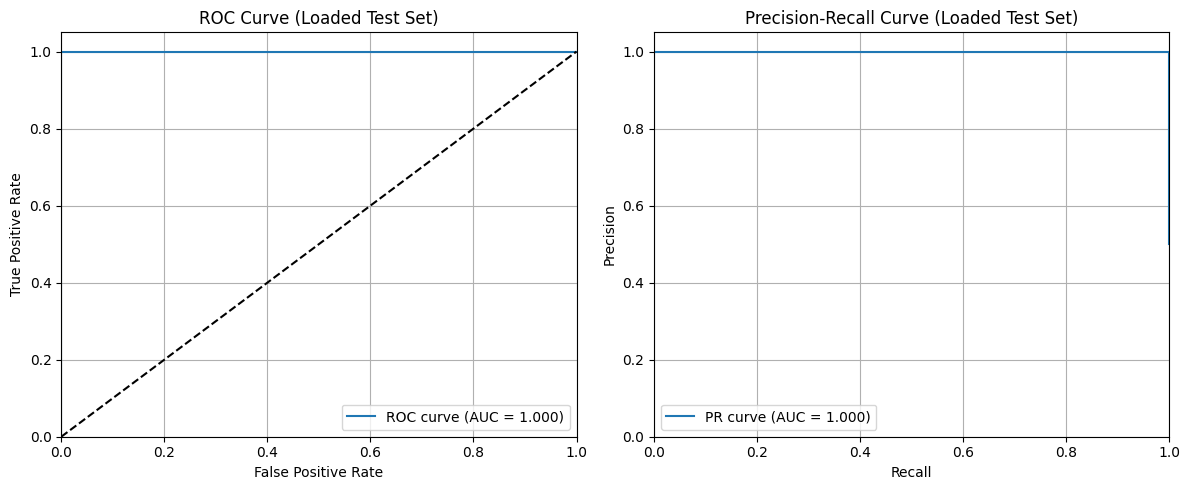


Test Classification Report (Loaded Model):
              precision    recall  f1-score   support

         cat       1.00      1.00      1.00       500
         dog       1.00      1.00      1.00       500

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



In [ ]:
import torch
import os

# Assuming `model` (AlexNet architecture) and `test_loader` are already defined
# (from running F1ipowFEaCxy and the data loading cell)

# --- Step 1: Identify the best epoch from results.txt (manual inspection for now) ---
# You would typically inspect 'results.txt' or the console output to find the epoch
# with the highest validation accuracy.
# For example, if epoch 6 had the best validation accuracy:
epoch_number_to_load = 6 # <--- IMPORTANT: Change this to the epoch you want to load

# Path to the checkpoint file
checkpoint_path = f'./checkpoints/epoch{epoch_number_to_load}.pt'

if os.path.exists(checkpoint_path):
    print(f"Loading model from checkpoint: {checkpoint_path}")
    # Make sure your model architecture is defined (e.g., from main_training_process)
    # We need to re-create the model structure first
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

    # Re-create AlexNet model structure
    import torchvision.models as models
    loaded_model = models.alexnet(pretrained=True)
    num_ftrs = loaded_model.classifier[6].in_features
    loaded_model.classifier[6] = torch.nn.Linear(num_ftrs, 2)
    loaded_model = loaded_model.to(device)

    # Load the state dictionary
    loaded_model.load_state_dict(torch.load(checkpoint_path, map_location=device))
    loaded_model.eval() # Set to evaluation mode
    print("Model loaded successfully.")

    # --- Step 2: Test the loaded model ---
    print("\nTesting the loaded model...")
    # Assuming test_model and compute_performance_metrics are defined in NP8SaJgpZNg9
    test_results_loaded = test_model(loaded_model, test_loader, device)

    # 10. Compute and plot test metrics for the loaded model
    test_metrics_loaded = compute_performance_metrics(loaded_model, test_loader, device)
    plot_performance_metrics(test_metrics_loaded, "(Loaded Test Set)")
    print("\nTest Classification Report (Loaded Model):")
    print(test_metrics_loaded['classification_report'])

else:
    print(f"Checkpoint file not found at {checkpoint_path}.")
    print("Please ensure the training loop ran for at least that epoch, or choose a different epoch number.")


In [ ]:
import torch
import os
import datetime

# Ensure the best_model directory exists
os.makedirs('./best_model', exist_ok=True)

# Assuming loaded_model is the model currently in memory (from epoch 6)
# and test_metrics_loaded contains its performance metrics

# Get the test accuracy of the loaded model
# (from the output of cell a58473b8, we know it's 1.0000)
current_test_acc = test_metrics_loaded['roc_auc'] # Using roc_auc as it's a float, acc was also 1.0000
epoch_number = epoch_number_to_load # From cell a58473b8

# Create a filename following a similar convention as the train_model function
model_save_path = f"./best_model/model.test_acc.{current_test_acc:.4f}.{datetime.datetime.now().strftime('%Y%m%d%H%M%S')}.epoch{epoch_number}.pt"

torch.save(loaded_model.state_dict(), model_save_path)
print(f"Loaded best model from Epoch {epoch_number} saved to: {model_save_path}")

Loaded best model from Epoch 6 saved to: ./best_model/model.test_acc.1.0000.20251214103626.epoch6.pt


In [ ]:
with open('./results.txt', 'r') as f:
    results_content = f.read()
print(results_content)

Phase: train epoch:  0/24 loss: 0.0346 Acc: 0.9883 auROC: 0.9993 auPR: 0.9993 precision: 0.9879 recall: 0.9887 f1: 0.9883 
Phase: val epoch:  0/24 loss: 0.0045 Acc: 0.9975 auROC: 1.0000 auPR: 1.0000 precision: 0.9950 recall: 1.0000 f1: 0.9975 
Phase: train epoch:  1/24 loss: 0.0124 Acc: 0.9954 auROC: 0.9999 auPR: 0.9999 precision: 0.9962 recall: 0.9946 f1: 0.9954 
Phase: val epoch:  1/24 loss: 0.0001 Acc: 1.0000 auROC: 1.0000 auPR: 1.0000 precision: 1.0000 recall: 1.0000 f1: 1.0000 
Phase: train epoch:  2/24 loss: 0.0064 Acc: 0.9981 auROC: 1.0000 auPR: 1.0000 precision: 0.9979 recall: 0.9983 f1: 0.9981 
Phase: val epoch:  2/24 loss: 0.0059 Acc: 0.9983 auROC: 1.0000 auPR: 1.0000 precision: 0.9967 recall: 1.0000 f1: 0.9983 
Phase: train epoch:  3/24 loss: 0.0071 Acc: 0.9981 auROC: 1.0000 auPR: 1.0000 precision: 0.9979 recall: 0.9983 f1: 0.9981 
Phase: val epoch:  3/24 loss: 0.0019 Acc: 0.9992 auROC: 1.0000 auPR: 1.0000 precision: 1.0000 recall: 0.9983 f1: 0.9992 
Phase: train epoch:  4/2

In [ ]:
import datetime # Added for using datetime.datetime.now()
import os # Added for os.makedirs
import torch.nn as nn # Explicitly import nn for clarity
import timm # Import timm for ViT model, though AlexNet will come from torchvision
import torchvision.models as models # Added for AlexNet

# Example usage for the complete training process
def main_training_process():
    """
    Complete training process example
    """
    # Set device
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

    # 1. Create model (AlexNet)
    # AlexNet from torchvision.models instead of timm
    model = models.alexnet(pretrained=True)
    # Modify the classifier for 2 classes
    num_ftrs = model.classifier[6].in_features
    model.classifier[6] = nn.Linear(num_ftrs, 2)
    model = model.to(device)

    # 2. Define criterion and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

    # 3. Learning rate scheduler
    lr_scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=5)

    # Create directories for saving checkpoints and best model
    os.makedirs('./checkpoints', exist_ok=True)
    os.makedirs('./best_model', exist_ok=True)

    # 4. Prepare dataloaders (assuming you have train_loader, val_loader, test_loader)
    dataloaders = {
        'train': train_loader,
        'val': val_loader
    }

    # 5. Train the model
    print("Starting training...")
    model = train_model(
        model, dataloaders, criterion, optimizer, lr_scheduler,
        num_epochs=25, device=device # Changed num_epochs back to 25
    )

    # 8. Compute and plot validation metrics (using the best model found during training)
    print("\nComputing validation metrics...")
    val_metrics = compute_performance_metrics(model, val_loader, device)
    plot_performance_metrics(val_metrics, "(Validation Set)")
    print("\nValidation Classification Report:")
    print(val_metrics['classification_report'])

    # 9. Test the model
    print("\nTesting the model...")
    test_results = test_model(model, test_loader, device)

    # 10. Compute and plot test metrics
    test_metrics = compute_performance_metrics(model, test_loader, device)
    plot_performance_metrics(test_metrics, "(Test Set)")
    print("\nTest Classification Report:")
    print(test_metrics['classification_report'])

    return model, test_results

In [ ]:
model, test_results = main_training_process()

/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Starting training...
Epoch 0/24
----------
train loss: 0.0346 Acc: 0.9883 
val loss: 0.0045 Acc: 0.9975 
2025-12-14 08:45:29.437339
Epoch 1/24
----------
train loss: 0.0124 Acc: 0.9954 
val loss: 0.0001 Acc: 1.0000 
2025-12-14 08:56:02.631825
Epoch 2/24
----------
train loss: 0.0064 Acc: 0.9981 
val loss: 0.0059 Acc: 0.9983 
2025-12-14 09:07:38.792818
Epoch 3/24
----------
train loss: 0.0071 Acc: 0.9981 
val loss: 0.0019 Acc: 0.9992 
2025-12-14 09:19:12.152928
Epoch 4/24
----------
train loss: 0.0037 Acc: 0.9990 
val loss: 0.0288 Acc: 0.9917 
2025-12-14 09:33:35.983891
Epoch 5/24
----------
train loss: 0.0119 Acc: 0.9965 
val loss: 0.0001 Acc: 1.0000 
2025-12-14 09:49:23.809648
Epoch 6/24
----------
train loss: 0.0010 Acc: 0.9994 
val loss: 0.0000 Acc: 1.0000 
2025-12-14 10:07:43.615718
Epoch 7/24
----------
train loss: 0.0000 Acc: 1.0000 
val loss: 0.0000 Acc: 1.0000 
2025-12-14 10:26:57.677896
Epoch 8/24
----------


KeyboardInterrupt: 